In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

In [3]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [6]:
x,y = make_classification(n_features = 5, n_redundant = 0, n_informative = 5, n_clusters_per_class = 1)

In [9]:
df = pd.DataFrame(x, columns = ['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.352506,0.835816,0.914488,2.211346,1.014272,0
1,1.185666,2.230067,1.689677,2.753456,2.104083,1
2,0.682647,-1.671345,-0.482595,2.596135,2.844686,0
3,1.209353,-0.861301,-3.538242,-0.808838,-1.287207,1
4,1.075356,-1.043628,-1.497680,0.146413,3.103135,1


In [10]:
bag = BaggingClassifier(max_features = 2)

In [11]:
bag.fit(df.iloc[:,:5], df.iloc[:,-1])

BaggingClassifier(max_features=2)

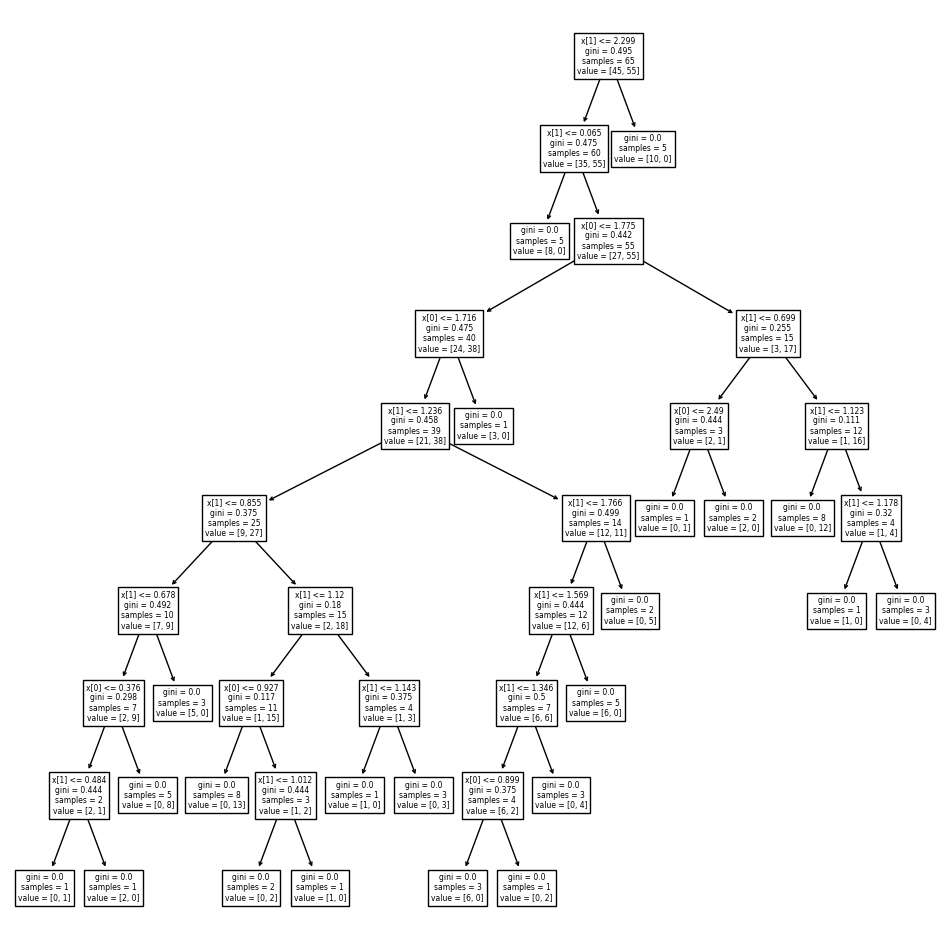

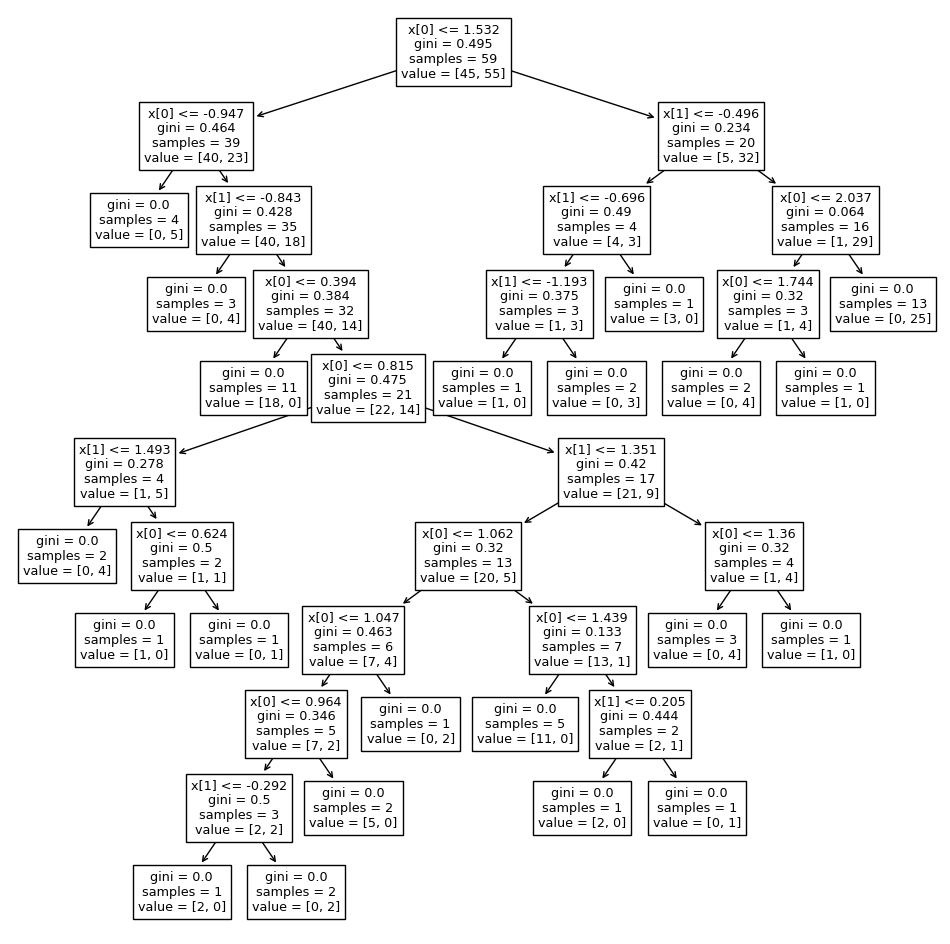

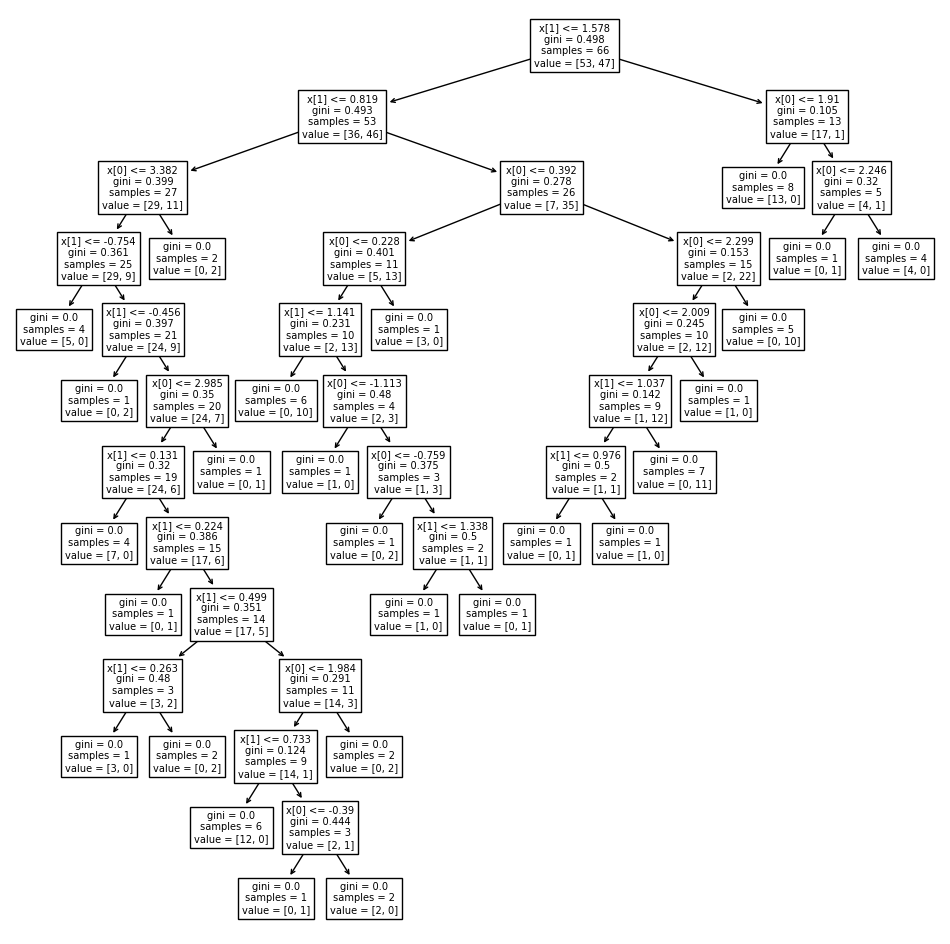

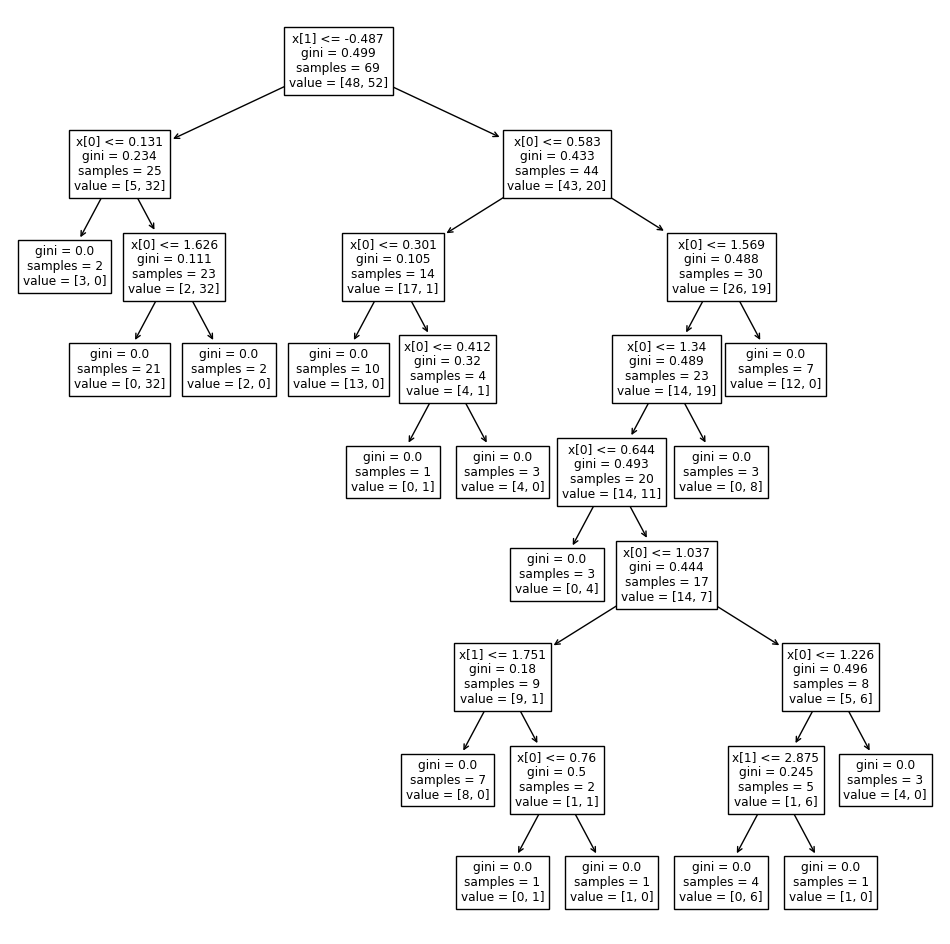

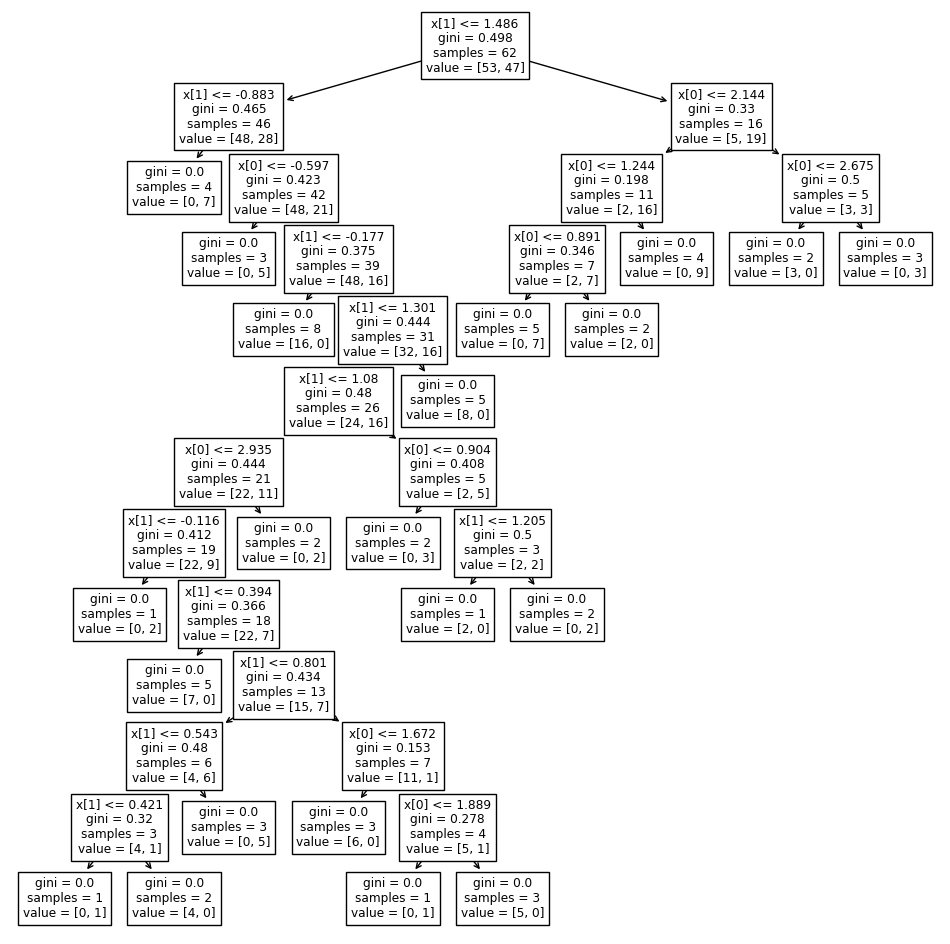

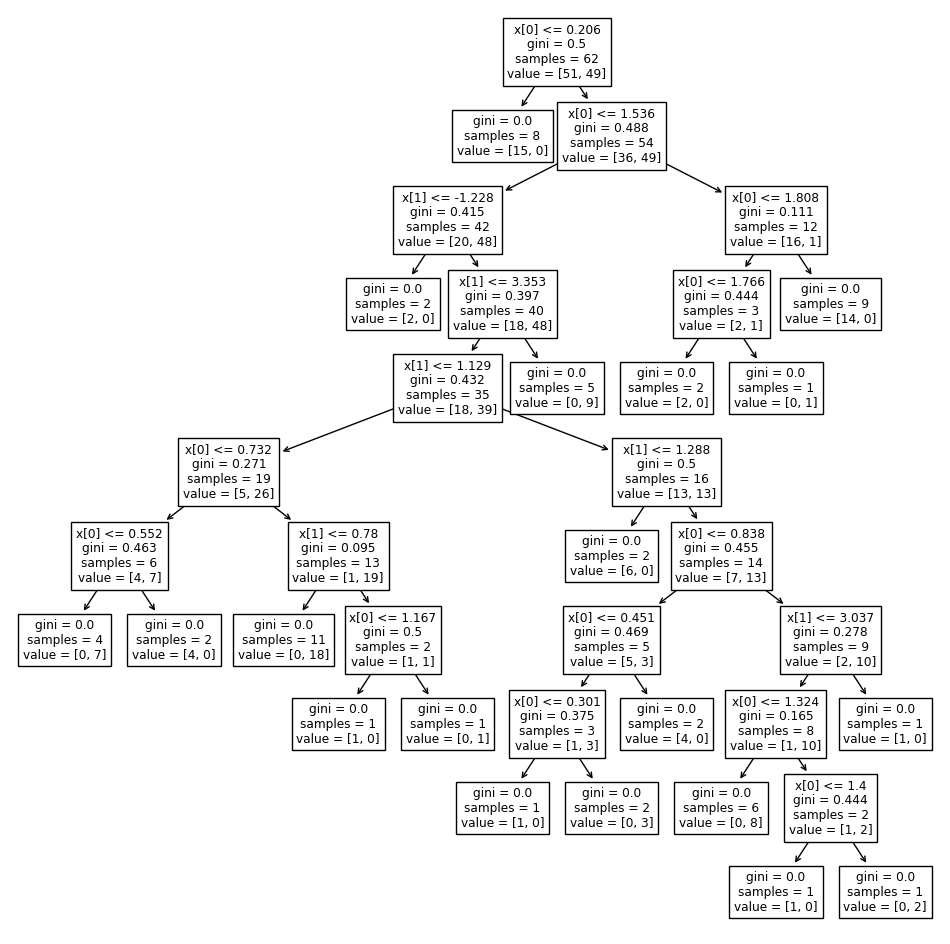

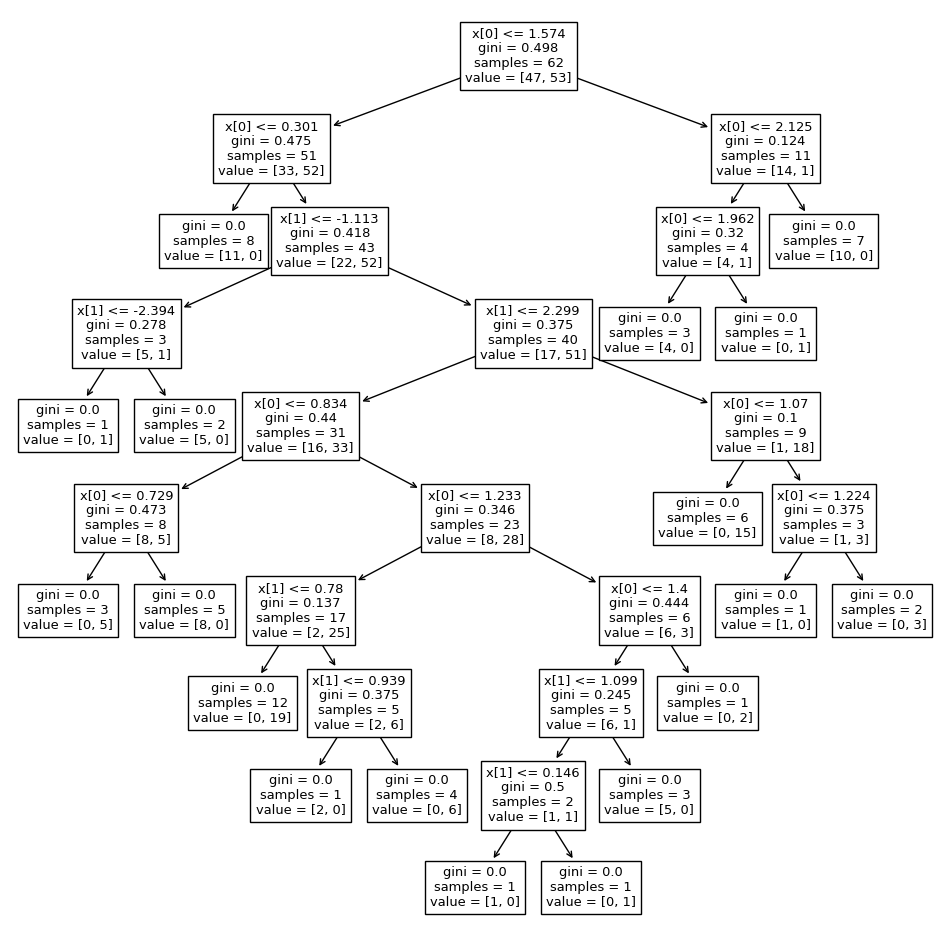

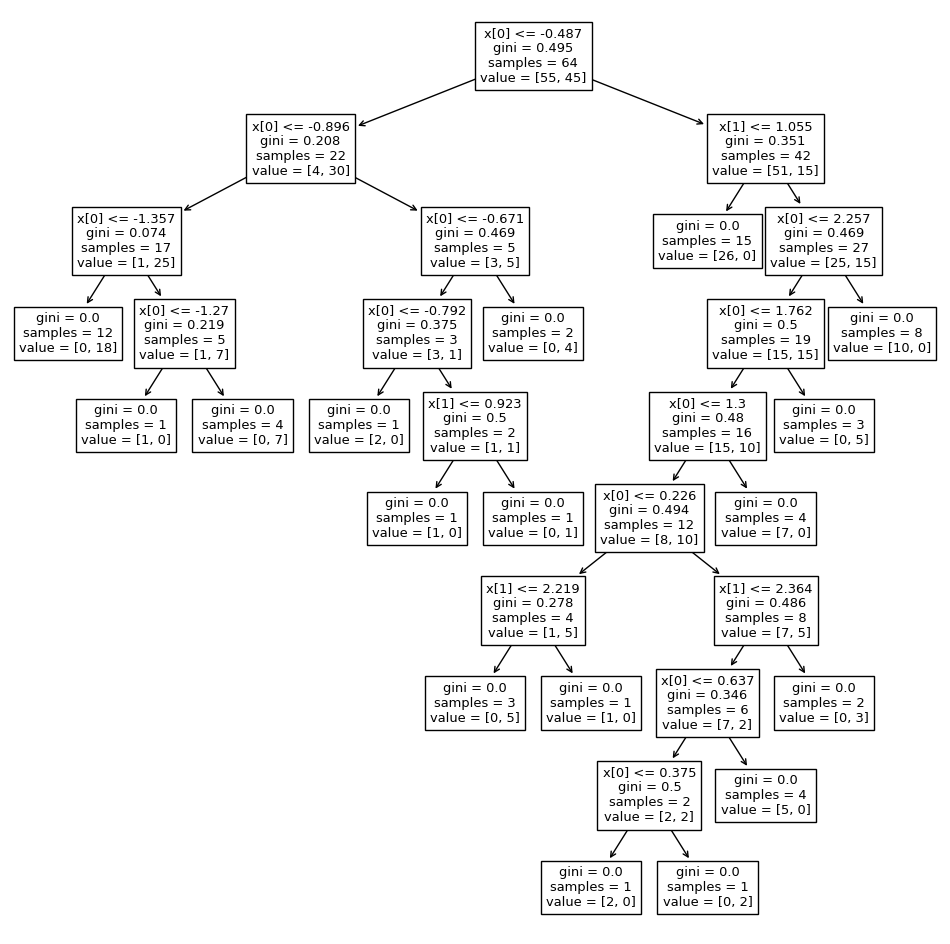

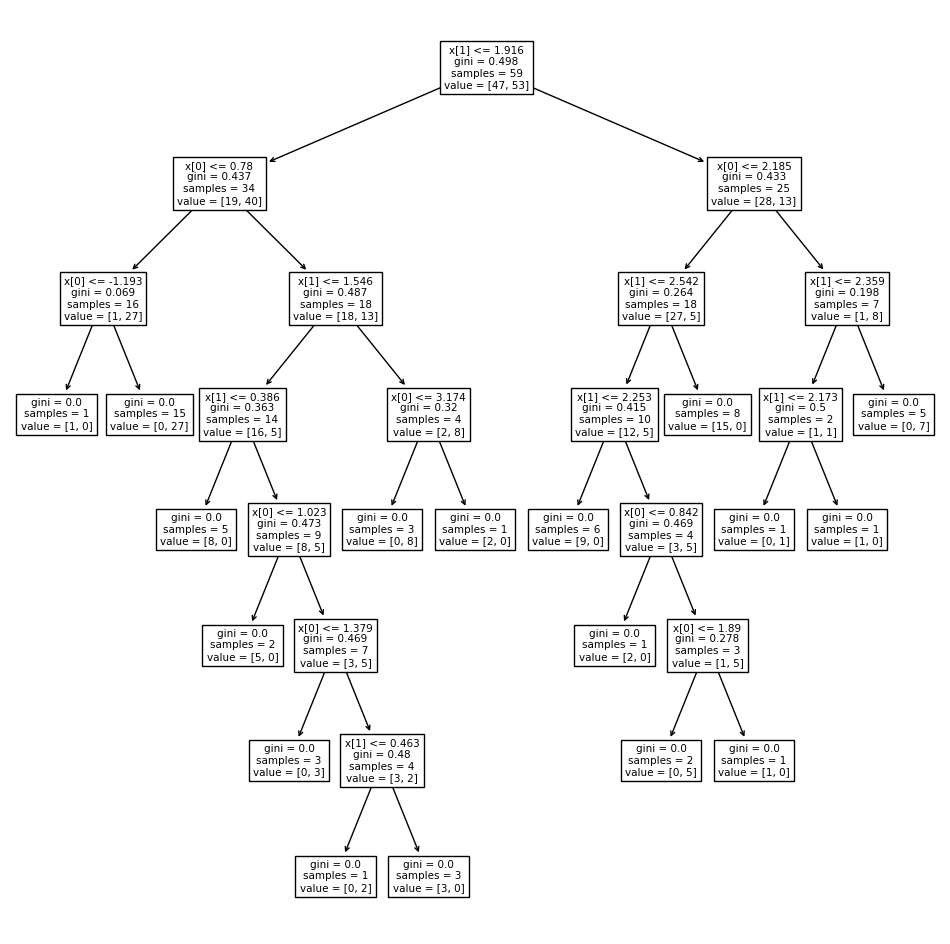

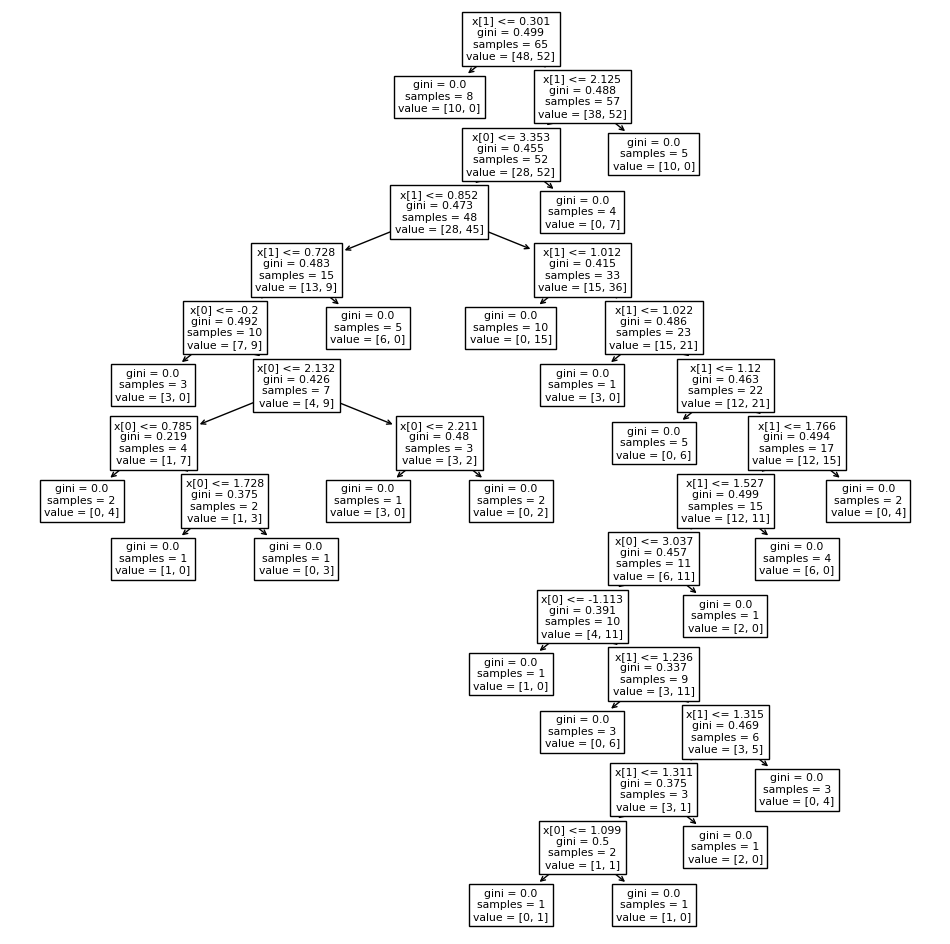

In [14]:
for i in range(0,10):
     plt.figure(figsize=(12,12))
     plot_tree(bag.estimators_[i])
     plt.show()

# RandomForestClassifier

In [15]:
rf = RandomForestClassifier()

In [16]:
rf.fit(df.iloc[:,:5], df.iloc[:,-1])

RandomForestClassifier()

# creating a model based on Randomforestclassifier

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [20]:
heart_data = pd.read_csv('heart.csv')

In [21]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
heart_data.shape

(303, 14)

In [27]:
x = heart_data.iloc[:,:13]
y = heart_data.iloc[:,-1]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
rf = RandomForestClassifier()
xg = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [33]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.819672131147541

In [34]:
xg.fit(x_train,y_train)
y_pred2 = xg.predict(x_test)
accuracy_score(y_test,y_pred2)

0.7704918032786885

In [35]:
svc.fit(x_train,y_train)
y_pred3 = svc.predict(x_test)
accuracy_score(y_test,y_pred3)

0.7049180327868853

In [36]:
lr.fit(x_train,y_train)
y_pred4 = lr.predict(x_test)
accuracy_score(y_test,y_pred4)

e:\Bagging\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

# hyperparameter tuning

Two ways of performing the hyperparameter tuning
1. grid search cv
2. random search cv

# grid search cv

In [37]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]

In [38]:
param_grid = {
     'n_estimators': n_estimators,
     'max_features':max_features,
     'max_depth':max_depth,
     'max_samples':max_samples
}

print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
rf_grid = GridSearchCV(
     estimator=rf,
     param_grid=param_grid,
     cv = 5,
     verbose = 2,
     n_jobs=-1
)
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [42]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 0.5, 'n_estimators': 120}

In [43]:
rf_grid.best_score_

0.8511904761904763

In [50]:
rf2 = RandomForestClassifier(max_depth=8, max_features=0.2, max_samples=0.5, n_estimators=120)
rf2.fit(x_train,y_train)
y_pred5 = rf2.predict(x_test)
accuracy_score(y_test,y_pred5)


0.8688524590163934

# Random search cv

In [52]:
n_estimators = [20,60,100,120]
max_features = [0.2,0.6,1.0]
max_depth = [2,8,None]
max_samples = [0.5,0.75,1.0]
bootstrap = [True,False]
min_samples_split = [2,5]
min_samples_leaf = [1,2]

In [53]:
param_grid2 = {
     'n_estimators':n_estimators,
     'max_features':max_features,
     'max_depth':max_depth,
     'max_samples':max_samples,
     'bootstrap':bootstrap,
     'min_samples_split':min_samples_split,
     'min_samples_leaf':min_samples_leaf
     
}
print(param_grid2)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
rf_grid2 = RandomizedSearchCV(
     estimator=rf,
     param_distributions=param_grid2,
     cv = 5,
     verbose = 2,
     n_jobs=-1
)

In [57]:
rf_grid2.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


e:\Bagging\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Bagging\env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Bagging\env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "e:\Bagging\env\lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [58]:
rf_grid2.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.75,
 'max_features': 0.2,
 'max_depth': None,
 'bootstrap': True}

In [61]:
rf5 = RandomForestClassifier(n_estimators= 100,min_samples_split= 5,min_samples_leaf= 1,
                             max_samples= 0.75,max_features= 0.2,max_depth= None,bootstrap= True)

In [62]:
rf5.fit(x_train,y_train)
y_pred6 = rf5.predict(x_test)
accuracy_score(y_test,y_pred6)

0.8360655737704918

# cross validation

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75), x,y,cv = 10,scoring='accuracy'))

0.821505376344086